<a href="https://colab.research.google.com/github/HalfMoon1008/yeardream/blob/main/TitanicEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data 출처 : [Kaggle Titanic](https://www.kaggle.com/competitions/titanic/data)

In [1]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 확인

In [3]:
df = pd.read_csv('/content/drive/MyDrive/00.이어드림/오프라인 6조/TitanicEDA/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.Cabin.unique()
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

## 결측치 처리

In [17]:
# 결측치 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

###age 결측치 처리

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

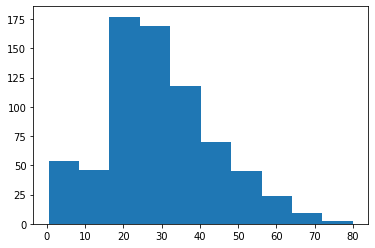

In [18]:
# 분포 확인
plt.hist(df['Age'],bins=10)

In [21]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [24]:
# 분포와 유사하게 결측치를 채워주기 위한 필요 데이터들. 평균, 표준분포, 크기
age_mean = df['Age'].mean()
age_mean

age_std = df['Age'].std()
age_std

age_size = 177
age_size

177

In [25]:
np.random.seed(177) 
rand_age = abs(np.random.normal(loc=age_mean, scale=age_std, size=age_size))
print(rand_age)
# np.random.normal()를 통한 정규분포를 통한 유사 난수 생성.
# age의 평균값, 표준편차, 난수의 크기를 넣어준다.
# 95%에 대해 나이대의 분포를 알아낼 수 있고, 5%의 경우 음수로 표시되기 때문에 abs로 감쌈

[51.42479078 29.91432739 10.46457256 26.29601646 41.78151751  8.9637407
  5.01973246 35.02813225 18.0493182  53.55933437 34.00894071 53.40008048
 43.98388481 45.27706814 27.01191214 14.33595173 57.90188109 51.18358024
 37.17944505 17.47012089 41.47263334 33.4443103  31.19432863 43.04385762
 36.05887893  7.83225411 50.57488512 23.56514834 46.13169471 44.78049179
 17.80032722 31.62935204 32.34439087 43.97495278 46.18473477 33.3619994
 30.62483988 43.23751483 30.88652345 36.49927013 27.76004906 51.80522163
 15.17975292 23.79248728 38.7071492  32.69295202  0.2145378  23.01420603
 43.63467742 22.62895803 31.07918642 52.65009912 36.05021942 31.37812438
 10.54380804 37.87209443 13.28645405 42.13514992 27.42151463 21.7241449
  8.55167021 42.55802987 36.65771192 22.44699227 28.94755216 47.05435527
 32.10877834 47.08957405 45.72830025 29.84380647 41.6422228  29.37813697
 26.39087692 14.81750796  0.34788416 20.4740921  26.86913579 36.27116607
 16.98852921 39.06724848 42.47615825 26.33331621 27.65

In [27]:
# Step 1) 조건 설정: 타이타닉 Age열의 결측치만 가져오기 
cond_isna = df['Age'].isna()

# Step 2) 조건이 True에 해당하는 것만 불러오기: 비어있는 값에 rand_age(정규분포샘플)값 채우기 
df['Age'][cond_isna] = rand_age

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(array([ 64.,  68., 202., 214., 143., 102.,  59.,  28.,   9.,   2.]),
 array([ 0.2145378 ,  8.19308402, 16.17163024, 24.15017646, 32.12872268,
        40.1072689 , 48.08581512, 56.06436134, 64.04290756, 72.02145378,
        80.        ]),
 <a list of 10 Patch objects>)

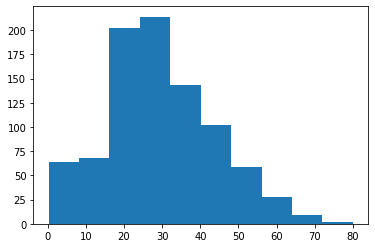

In [29]:
plt.hist(df['Age'],bins=10)

In [31]:
df['Age'].describe()

count    891.000000
mean      29.820020
std       14.384434
min        0.214538
25%       20.750000
50%       28.947552
75%       39.000000
max       80.000000
Name: Age, dtype: float64

**결측치가 존재했을 때의 data**   
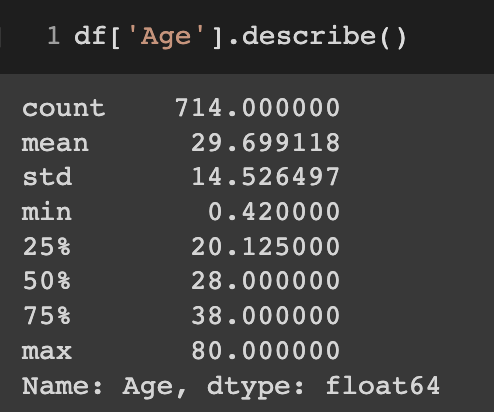

기존의 분포 그래프와는 차이를 보이지만   
이외의 값에서는 유사한 값을 보이기 때문에 이대로 진행

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 이외의 값들 결측치 처리

In [35]:
# 선착장 정보는 최빈도값으로 대체
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## EDA 시작

In [9]:
survival = df.Survived.sum()
n_survival = df.shape[0] - survival
print(survival,n_survival)

342 549


In [10]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

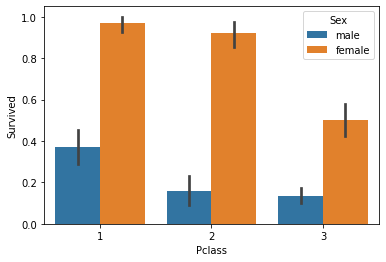

In [16]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

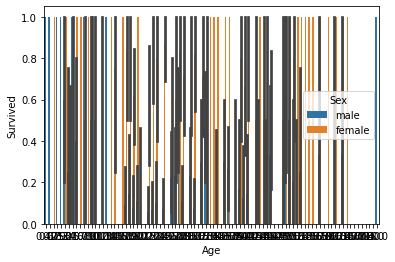

In [17]:
sns.barplot(x='Age', y='Survived', hue='Sex', data=df)

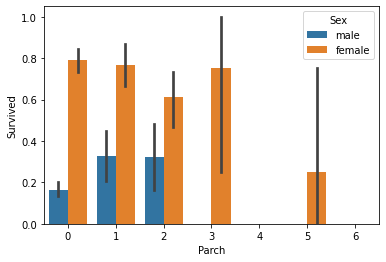

In [18]:
sns.barplot(x='Parch', y='Survived', hue='Sex', data=df)

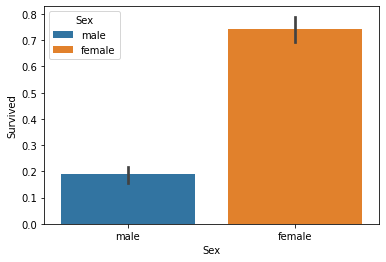

In [20]:
sns.barplot(x=df['Sex'], y=df['Survived'], hue=df['Sex'], dodge=False)

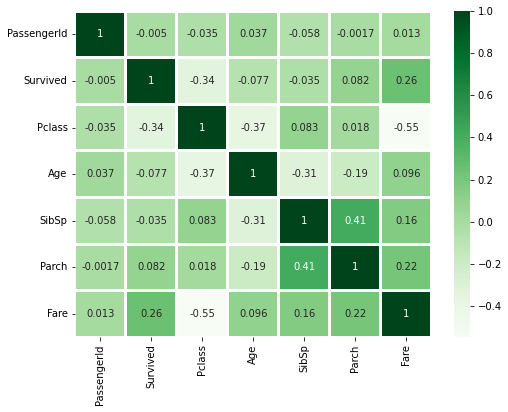

In [24]:
plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, linewidths=2, cmap = 'Greens')

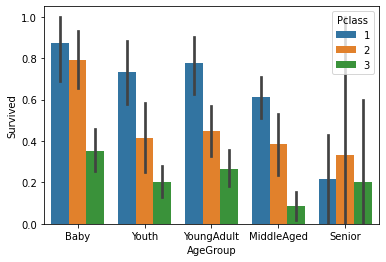

In [28]:
bin = [0, 18, 25, 35, 60, 100]
group_names = ['Baby', 'Youth', 'YoungAdult', 'MiddleAged', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bin, labels=group_names)
df['AgeGroup'].value_counts()

sns.barplot(x='AgeGroup', y='Survived', hue='Pclass', data=df)

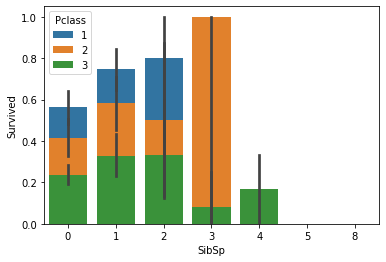

In [29]:
sns.barplot(x='SibSp', y='Survived', hue='Pclass', data=df, dodge=False)